<a href="https://colab.research.google.com/github/Jumas-Cola/Neural_Networks_and_CV/blob/master/PyTorch_LeNet_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import random
import numpy as np

def determinate_notebook():
  random.seed(0)
  np.random.seed(0)
  torch.manual_seed(0)
  torch.cuda.manual_seed(0)
  torch.backends.cudnn.deterministic = True

determinate_notebook()

In [2]:
import torchvision.datasets

CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [4]:
len(y_train), len(y_test)

(50000, 10000)

In [5]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [0]:
X_train /= 225.
X_test /= 225.

In [7]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

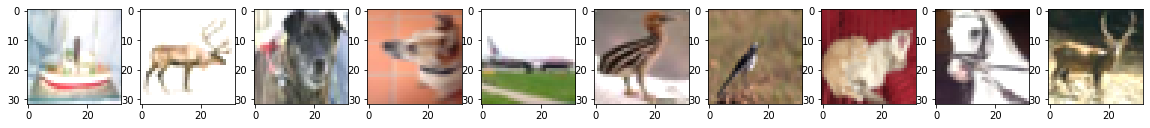

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.imshow(X_train[np.random.randint(0, len(y_train) - 1)])
  print(y_train[i], end=' ')

In [9]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [0]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [11]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [0]:
class LeNet5(torch.nn.Module):
  def __init__(self,
               activation='tanh',
               pooling='avg',
               conv_size=5,
               use_batch_norm=False):
    super().__init__()

    self.conv_size = conv_size
    self.use_batch_norm = use_batch_norm

    if activation == 'tanh':
      activation_function = torch.nn.Tanh()
    elif activation == 'relu':
      activation_function = torch.nn.ReLU()
    else:
      raise NotImplementedError
    
    if pooling == 'avg':
      pooling_layer = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    elif pooling == 'max':
      pooling_layer = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    else:
      raise NotImplementedError

    if conv_size == 5:
      self.conv1 = torch.nn.Conv2d(
          in_channels=3, out_channels=6, kernel_size=5, padding=0)
    elif conv_size == 3:
      self.conv1_1 = torch.nn.Conv2d(
          in_channels=3, out_channels=6, kernel_size=3, padding=0)
      self.conv1_2 = torch.nn.Conv2d(
          in_channels=6, out_channels=6, kernel_size=3, padding=0)
    else:
      raise NotImplementedError

    self.act1 = activation_function
    self.bn1 = torch.nn.BatchNorm2d(num_features=6)
    self.pool1 = pooling_layer

    if conv_size == 5:
      self.conv2 = torch.nn.Conv2d(
          in_channels=6, out_channels=16, kernel_size=5, padding=0)
    elif conv_size == 3:
      self.conv2_1 = torch.nn.Conv2d(
          in_channels=6, out_channels=16, kernel_size=3, padding=0)
      self.conv2_2 = torch.nn.Conv2d(
          in_channels=16, out_channels=16, kernel_size=3, padding=0)
    else:
      raise NotImplementedError

    self.act2 = activation_function
    self.bn2 = torch.nn.BatchNorm2d(num_features=16)
    self.pool2 = pooling_layer


    self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
    self.act3 = activation_function

    self.fc2 = torch.nn.Linear(120, 84)
    self.act4 = activation_function

    self.fc3 = torch.nn.Linear(84, 10)

  def forward(self, x):
    if self.conv_size == 5:
      x = self.conv1(x)
    elif self.conv_size == 3:
      x = self.conv1_2(self.conv1_1(x))
    x = self.act1(x)
    if self.use_batch_norm:
      x = self.bn1(x)
    x = self.pool1(x)

    if self.conv_size == 5:
      x = self.conv2(x)
    elif self.conv_size == 3:
      x = self.conv2_2(self.conv2_1(x))
    x = self.act2(x)
    if self.use_batch_norm:
      x = self.bn2(x)
    x = self.pool2(x)

    x= x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

    x = self.fc1(x)
    x = self.act3(x)

    x = self.fc2(x)
    x = self.act4(x)

    x = self.fc3(x)

    return x

lenet5 = LeNet5()

In [13]:
!nvidia-smi

Sun Feb 23 21:32:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [14]:
def train(net, X_train, y_train, X_test, y_test,
          batch_size=100,
          lr=1.0e-3,
          epoches=30):
  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
  net = net.to(device)

  loss = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(net.parameters(), lr=lr)

  test_accuracy_history = []
  test_loss_history = []

  X_test = X_test.to(device)
  y_test = y_test.to(device)

  for epoch in range(epoches):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
      optimizer.zero_grad()
      net.train()

      batch_indexes = order[start_index:start_index+batch_size]

      X_batch = X_train[batch_indexes].to(device)
      y_batch = y_train[batch_indexes].to(device)

      preds = net.forward(X_batch)

      loss_value = loss(preds, y_batch)
      loss_value.backward()

      optimizer.step()

      X_batch
    
    net.eval()
    test_preds = net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)
  print('-' * 20)
  del net
  return test_accuracy_history, test_loss_history

accuracies = {}
losses = {}


net = LeNet5(activation='tanh', conv_size=5)
accuracies['tanh'], losses['tanh'] = train(net, X_train, y_train, X_test, y_test)

net = LeNet5(activation='relu', conv_size=5)
accuracies['relu'], losses['relu'] = train(net, X_train, y_train, X_test, y_test)

net = LeNet5(activation='relu', conv_size=3)
accuracies['relu_3'], losses['relu_3'] = train(net, X_train, y_train, X_test, y_test)

net = LeNet5(activation='relu', conv_size=3, pooling='max')
accuracies['relu_3_max_pool'], losses['relu_3_max_pool'] = \
  train(net, X_train, y_train, X_test, y_test)

net = LeNet5(activation='relu', conv_size=3, pooling='max', use_batch_norm=True)
accuracies['relu_3_max_pool_bn'], losses['relu_3_max_pool_bn'] = \
  train(net, X_train, y_train, X_test, y_test)


tensor(0.3951)
tensor(0.4486)
tensor(0.4781)
tensor(0.5075)
tensor(0.5145)
tensor(0.5256)
tensor(0.5368)
tensor(0.5482)
tensor(0.5481)
tensor(0.5548)
tensor(0.5581)
tensor(0.5580)
tensor(0.5569)
tensor(0.5677)
tensor(0.5705)
tensor(0.5724)
tensor(0.5658)
tensor(0.5714)
tensor(0.5660)
tensor(0.5694)
tensor(0.5672)
tensor(0.5579)
tensor(0.5655)
tensor(0.5593)
tensor(0.5612)
tensor(0.5619)
tensor(0.5586)
tensor(0.5593)
tensor(0.5545)
tensor(0.5552)
--------------------
tensor(0.3885)
tensor(0.4396)
tensor(0.4665)
tensor(0.5081)
tensor(0.5339)
tensor(0.5304)
tensor(0.5595)
tensor(0.5634)
tensor(0.5737)
tensor(0.5850)
tensor(0.5854)
tensor(0.5869)
tensor(0.5880)
tensor(0.5905)
tensor(0.5981)
tensor(0.5909)
tensor(0.6017)
tensor(0.6105)
tensor(0.6039)
tensor(0.5898)
tensor(0.6050)
tensor(0.6077)
tensor(0.6032)
tensor(0.6088)
tensor(0.6056)
tensor(0.6063)
tensor(0.6103)
tensor(0.6060)
tensor(0.6024)
tensor(0.6095)
--------------------
tensor(0.4220)
tensor(0.4789)
tensor(0.5051)
tensor(0.5158

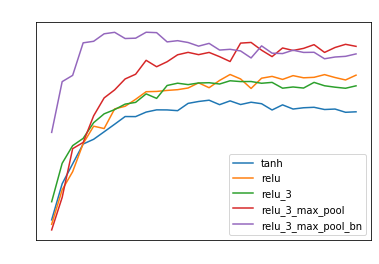

In [15]:
for experiment_id in accuracies.keys():
  plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.tick_params(colors='w')
plt.title('Validation Accuracy', c='w');

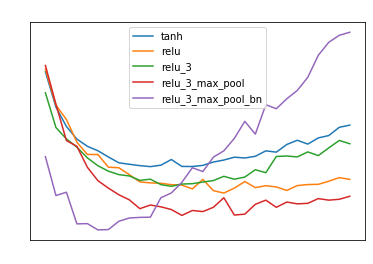

In [16]:
for experiment_id in losses.keys():
  plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.tick_params(colors='w')
plt.title('Validation Loss', c='w');

In [0]:
class CIFARNet(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.batch_norm0 = torch.nn.BatchNorm2d(3)

    # Conv 5
    #####################################
    # self.conv1 = torch.nn.Conv2d(3, 32, 5, padding=2)
    # self.act1 = torch.nn.ReLU()
    # self.batch_norm1 = torch.nn.BatchNorm2d(32)
    # self.pool1 = torch.nn.MaxPool2d(2, 2)
    #####################################

    self.conv1 = torch.nn.Conv2d(3, 16, 3, padding=1)
    self.act1 = torch.nn.ReLU()
    self.batch_norm1 = torch.nn.BatchNorm2d(16)
    self.pool1 = torch.nn.MaxPool2d(2, 2)

    self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)
    self.act2 = torch.nn.ReLU()
    self.batch_norm2 = torch.nn.BatchNorm2d(32)
    self.pool2 = torch.nn.MaxPool2d(2, 2)

    self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1)
    self.act3 = torch.nn.ReLU()
    self.batch_norm3 = torch.nn.BatchNorm2d(64)

    # Conv 5
    #####################################
    # self.fc1 = torch.nn.Linear(16 * 16 * 64, 256)
    #####################################

    self.fc1 = torch.nn.Linear(8 * 8 * 64, 256)
    self.act4 = torch.nn.Tanh()
    self.batch_norm4 = torch.nn.BatchNorm1d(256)

    self.fc2 = torch.nn.Linear(256, 64)
    self.act5 = torch.nn.Tanh()
    self.batch_norm5 = torch.nn.BatchNorm1d(64)

    self.fc3 = torch.nn.Linear(64, 10)

  def forward(self, x):
    x = self.batch_norm0(x)
    x = self.conv1(x)
    x = self.act1(x)
    x = self.batch_norm1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.act2(x)
    x = self.batch_norm2(x)
    x = self.pool2(x)

    x = self.conv3(x)
    x = self.act3(x)
    x = self.batch_norm3(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    x = self.fc1(x)
    x = self.act4(x)
    x = self.batch_norm4(x)

    x = self.fc2(x)
    x = self.act5(x)
    x = self.batch_norm5(x)

    x = self.fc3(x)

    return x


In [18]:
accuracies['cifar_net'], losses['cifar_net'] = \
  train(CIFARNet(), X_train, y_train, X_test, y_test)

tensor(0.6519)
tensor(0.6892)
tensor(0.7042)
tensor(0.7129)
tensor(0.7238)
tensor(0.7198)
tensor(0.7137)
tensor(0.7145)
tensor(0.7185)
tensor(0.7175)
tensor(0.7210)
tensor(0.7050)
tensor(0.7161)
tensor(0.7201)
tensor(0.7157)
tensor(0.7086)
tensor(0.7102)
tensor(0.7168)
tensor(0.7172)
tensor(0.7115)
tensor(0.7119)
tensor(0.7143)
tensor(0.7130)
tensor(0.7093)
tensor(0.7182)
tensor(0.7122)
tensor(0.7099)
tensor(0.7107)
tensor(0.7154)
tensor(0.7227)
--------------------


In [19]:
from torchvision.models import resnet18
accuracies['resnet18'], losses['resnet18'] = \
  train(resnet18(), X_train, y_train, X_test, y_test)

tensor(0.5787)
tensor(0.6048)
tensor(0.5898)
tensor(0.6932)
tensor(0.6635)
tensor(0.7075)
tensor(0.7117)
tensor(0.7204)
tensor(0.7224)
tensor(0.7528)
tensor(0.7340)
tensor(0.7278)
tensor(0.7142)
tensor(0.7170)
tensor(0.7350)
tensor(0.7406)
tensor(0.7473)
tensor(0.7535)
tensor(0.7677)
tensor(0.7540)
tensor(0.7444)
tensor(0.7384)
tensor(0.7497)
tensor(0.7091)
tensor(0.7566)
tensor(0.7509)
tensor(0.7370)
tensor(0.7499)
tensor(0.7617)
tensor(0.7604)
--------------------


Text(0.5, 1.0, 'Validation Accuracy')

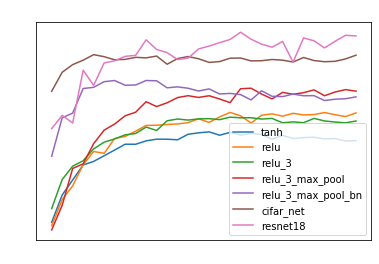

In [20]:
for experiment_id in accuracies.keys():
  plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.tick_params(colors='w')
plt.title('Validation Accuracy', c='w')

Text(0.5, 1.0, 'Validation Loss')

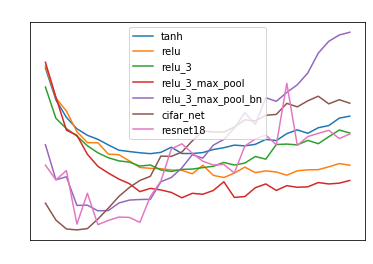

In [21]:
for experiment_id in losses.keys():
  plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.tick_params(colors='w')
plt.title('Validation Loss', c='w')